In [37]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [38]:
image_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\training_data'

In [39]:
image_dir

'C:\\Users\\kalma\\OneDrive\\Desktop\\ocr_enhanced data\\training_data'

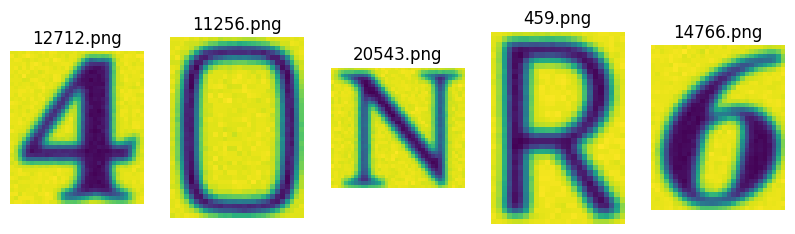

In [40]:
import random
# Function to load and visualize a few sample images from subdirectories
def visualize_sample_images(image_dir, num_samples=5):
    sample_images = []  # List to hold image paths
    # Iterate through each folder in the main dataset directory
    for folder_name in os.listdir(image_dir):
        folder_path = os.path.join(image_dir, folder_name)
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Get image files from the subdirectory
            image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')  # Include any other image formats you expect
            images_in_folder = [f for f in os.listdir(folder_path) if f.lower().endswith(image_extensions)]
            
            # Randomly sample images from the folder (up to 1 for each character)
            if images_in_folder:
                sample_images.append(os.path.join(folder_path, random.choice(images_in_folder)))
    
    # Shuffle the sampled images and limit to the required number of samples
    random.shuffle(sample_images)
    sample_images = sample_images[:num_samples]

    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(sample_images):
        try:
            image = Image.open(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(os.path.basename(img_path))  # Show filename as title
        except Exception as e:
            print(f"Error opening image {img_path}: {e}")  # Print error if unable to open the image

    plt.show()

# Call the function to visualize
visualize_sample_images(image_dir)


In [41]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import os
import cv2  # OpenCV for image processing

# Set your input and output directories
input_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\training_data'
output_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\resized_training_data'  # New directory for resized images

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to resize images
def resize_images(input_dir, output_dir):
    # Iterate through each folder in the main dataset directory
    for folder_name in os.listdir(input_dir):
        folder_path = os.path.join(input_dir, folder_name)
        # Create a corresponding folder in the output directory
        resized_folder_path = os.path.join(output_dir, folder_name)
        os.makedirs(resized_folder_path, exist_ok=True)
        
        if os.path.isdir(folder_path):
            # Load each image in the folder
            for image_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, image_name)
                # Read the image in grayscale
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
                if image is not None:  # Check if the image was loaded successfully
                    resized_image = cv2.resize(image, (32, 32))  # Resize to 32x32
                    # Save the resized image
                    resized_img_path = os.path.join(resized_folder_path, image_name)
                    cv2.imwrite(resized_img_path, resized_image)

# Call the function to resize images
resize_images(input_dir, output_dir)

print(f"Images have been resized and saved to {output_dir}.")


Images have been resized and saved to C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\resized_training_data.


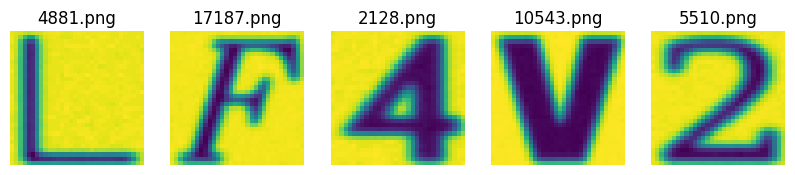

In [44]:
# Set the path to your resized images directory
output_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\resized_training_data'

# Function to load and visualize a few sample images from subdirectories
def visualize_sample_images(image_dir, num_samples=5):
    sample_images = []  # List to hold image paths
    # Iterate through each folder in the main dataset directory
    for folder_name in os.listdir(image_dir):
        folder_path = os.path.join(image_dir, folder_name)
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Get image files from the subdirectory
            image_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')  # Include any other image formats you expect
            images_in_folder = [f for f in os.listdir(folder_path) if f.lower().endswith(image_extensions)]
            
            # Randomly sample one image from each folder if available
            if images_in_folder:
                sample_images.append(os.path.join(folder_path, random.choice(images_in_folder)))
    
    # Shuffle the sampled images and limit to the required number of samples
    random.shuffle(sample_images)
    sample_images = sample_images[:num_samples]

    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(sample_images):
        try:
            image = Image.open(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(os.path.basename(img_path))  # Show filename as title
        except Exception as e:
            print(f"Error opening image {img_path}: {e}")  # Print error if unable to open the image

    plt.show()

# Call the function to visualize resized images
visualize_sample_images(output_dir, num_samples=5)  # You can adjust the number of samples as needed


In [45]:
import os
import numpy as np
from PIL import Image

# Function to normalize pixel values of images in a directory
def normalize_images(image_dir, output_dir):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through each folder in the main dataset directory
    for folder_name in os.listdir(image_dir):
        folder_path = os.path.join(image_dir, folder_name)
        if os.path.isdir(folder_path):
            # Create a corresponding folder in the output directory
            output_folder = os.path.join(output_dir, folder_name)
            os.makedirs(output_folder, exist_ok=True)

            # Process each image in the folder
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Include any other image formats you expect
                    # Load image
                    image = Image.open(img_path).convert('L')  # Convert to grayscale if not already
                    # Normalize image
                    image_array = np.array(image) / 255.0  # Normalize to range [0, 1]
                    # Convert back to image format (optional)
                    normalized_image = Image.fromarray((image_array * 255).astype(np.uint8))
                    # Save normalized image
                    normalized_image.save(os.path.join(output_folder, filename))

# Set your input and output directories
input_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\resized_training_data'
output_normalized_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'

# Call the function to normalize images
normalize_images(input_dir, output_normalized_dir)


In [47]:
import os

train_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'

total_images = sum(
    len([f for f in os.listdir(os.path.join(train_dir, folder)) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
    for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))
)
print(f"Total images in original training data: {total_images}")


Total images in original training data: 20628


In [48]:
# Path to your normalized dataset directory
normalized_image_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'

def check_normalization(image_dir):
    all_pixel_values = []
    image_count = 0  # Counter for images loaded
    print("Loading images from:", image_dir)  # Debug statement

    # Iterate through each folder (representing characters) in the normalized dataset
    for folder_name in os.listdir(image_dir):
        folder_path = os.path.join(image_dir, folder_name)
        if os.path.isdir(folder_path):  # Check if it's a directory
            # Iterate through each image file in the character folder
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    img_path = os.path.join(folder_path, filename)
                    print(f"Loading image: {img_path}")  # Debug statement
                    image = Image.open(img_path)
                    # Convert image to a numpy array and flatten it
                    pixel_values = np.array(image).flatten()
                    all_pixel_values.extend(pixel_values)
                    image_count += 1  # Increment the counter for each image

    # Convert list to numpy array for easier analysis
    all_pixel_values = np.array(all_pixel_values)

    # Check if the array is empty
    if all_pixel_values.size == 0:
        print("No pixel values found. Check if the directory contains valid images.")
        return

    # Check minimum and maximum values
    min_value = np.min(all_pixel_values)
    max_value = np.max(all_pixel_values)

    print(f'Minimum pixel value: {min_value}')
    print(f'Maximum pixel value: {max_value}')
    print(f'Total images loaded: {image_count}')  # Print total number of images loaded

# Call the function to check normalization
check_normalization(normalized_image_dir)


Loading images from: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\0.png
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\10008.png
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\10044.png
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\1008.png
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\10080.png
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\10116.png
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\10152.png
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\10188.png
Loading image: C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data\0\1

In [49]:
def count_images_in_directory(image_dir):
    total_images = 0  # Initialize the counter for images
    # Iterate through each folder in the specified directory
    for folder_name in os.listdir(image_dir):
        folder_path = os.path.join(image_dir, folder_name)
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Count image files in the current directory
            image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
            total_images += len(image_files)  # Add the count of image files to total
    
    return total_images

# Specify the paths to your directories
dataset_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\training_data'
normalized_dataset_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'
resized_dataset_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\resized_training_data'

# Count images in each directory
total_images_dataset = count_images_in_directory(dataset_dir)
total_images_normalized = count_images_in_directory(normalized_dataset_dir)
total_images_resized = count_images_in_directory(resized_dataset_dir)

# Print the results
print(f'Total images in dataset: {total_images_dataset}')
print(f'Total images in normalized dataset: {total_images_normalized}')
print(f'Total images in resized dataset: {total_images_resized}')


Total images in dataset: 20628
Total images in normalized dataset: 20628
Total images in resized dataset: 20628


In [50]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img


In [51]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)

Keras version: 3.4.1
TensorFlow version: 2.17.0


In [52]:
import os
import shutil
import random

# Set paths
train_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'
val_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\validation_data'
test_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\testing_data'

# Ensure validation directory exists
os.makedirs(val_dir, exist_ok=True)

# Split ratio for validation
val_ratio = 0.15  # Percentage of training data to be used for validation

# Iterate through each class folder in the training dataset
for folder_name in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder_name)
    if os.path.isdir(folder_path):
        # Get all image files in the folder
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

        # Shuffle the image files
        random.shuffle(image_files)

        # Calculate split index for validation
        total_images = len(image_files)
        val_end = int(val_ratio * total_images)

        # Split the files
        val_files = image_files[:val_end]
        remaining_train_files = image_files[val_end:]

        # Create destination folder for the validation set
        os.makedirs(os.path.join(val_dir, folder_name), exist_ok=True)

        # Move files to the validation folder
        for file in val_files:
            shutil.move(os.path.join(folder_path, file), os.path.join(val_dir, folder_name, file))

        # No need to move remaining training files; they stay in the original training folder

print("Training data has been split into new training and validation sets.")


Training data has been split into new training and validation sets.


In [20]:
val_dir


'C:\\Users\\kalma\\OneDrive\\Desktop\\ocr_enhanced data\\validation_data'

In [54]:
import os

# Set the directories for the training, validation, and testing datasets
train_dataset_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'
val_dataset_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\validation_data'
test_dataset_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\testing_data'

def count_images(image_dir):
    total_images = 0
    for character in os.listdir(image_dir):
        character_path = os.path.join(image_dir, character)
        if os.path.isdir(character_path):
            total_images += len(os.listdir(character_path))  # Count images in each character folder
    return total_images

# Count the number of images in each dataset
train_images = count_images(train_dataset_dir)
val_images = count_images(val_dataset_dir)
test_images = count_images(test_dataset_dir)

# Calculate total images
total_images = train_images + val_images + test_images

# Print results
print(f'Training set size: {train_images} images')
print(f'Validation set size: {val_images} images')
print(f'Testing set size: {test_images} images')
print(f'Total images accounted: {total_images} images')

# Verification of the ratios
expected_train_size = int(0.7 * total_images)
expected_val_size = int(0.15 * total_images)
expected_test_size = total_images - expected_train_size - expected_val_size  # Ensure it adds up

# Print verification results
print(f'Expected Training size: {expected_train_size}, Actual: {train_images}')
print(f'Expected Validation size: {expected_val_size}, Actual: {val_images}')
print(f'Expected Testing size: {expected_test_size}, Actual: {test_images}')

# Check if the actual sizes match the expected sizes
print(f'Training size matches: {train_images == expected_train_size}')
print(f'Validation size matches: {val_images == expected_val_size}')
print(f'Testing size matches: {test_images == expected_test_size}')


Training set size: 17568 images
Validation set size: 3060 images
Testing set size: 1008 images
Total images accounted: 21636 images
Expected Training size: 15145, Actual: 17568
Expected Validation size: 3245, Actual: 3060
Expected Testing size: 3246, Actual: 1008
Training size matches: False
Validation size matches: False
Testing size matches: False


In [55]:
import os

train_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'

total_images = sum(
    len([f for f in os.listdir(os.path.join(train_dir, folder)) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
    for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))
)
print(f"Total images in original training data: {total_images}")


Total images in original training data: 17568


In [56]:
import os

train_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\validation_data'

total_images = sum(
    len([f for f in os.listdir(os.path.join(train_dir, folder)) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
    for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))
)
print(f"Total images in original training data: {total_images}")


Total images in original training data: 3060


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Paths to directories
train_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'
val_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\validation_data'

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Removed augmentation
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Reduced image size
    batch_size=16,  # Reduced batch size
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),  # Reduced image size
    batch_size=16,  # Reduced batch size
    class_mode='categorical'
)

# Load the base ResNet50 model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers for your task
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with smaller learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Reduced learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_finetuned_model.keras', monitor='val_loss', save_best_only=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Initial training (freeze the base model)
print("Starting initial training (frozen base model)...")
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

# Load the best model after initial training
print("Loading the best model after initial training...")
best_model = tf.keras.models.load_model('best_finetuned_model.keras')

# Gradual unfreezing: Unfreeze the last few layers first
print("Starting gradual unfreezing...")
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Compile the model again with a lower learning rate
best_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning the unfrozen layers
print("Starting fine-tuning (gradual unfreezing)...")
fine_tune_history = best_model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint, lr_reduction]
)

# Further unfreezing: Unfreeze more layers
print("Unfreezing more layers...")
for layer in base_model.layers[-16:]:
    layer.trainable = True

# Compile with an even lower learning rate
best_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),  # Even lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning with more layers unfrozen
print("Fine-tuning with more layers unfrozen...")
fine_tune_history_2 = best_model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint, lr_reduction]
)

# Evaluate the final model
print("Evaluating the best model...")
val_loss, val_accuracy = best_model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plot training and validation performance
def plot_training(history, fine_tune_history, fine_tune_history_2):
    """Plot training accuracy and loss from all training phases."""
    acc = history.history['accuracy'] + fine_tune_history.history['accuracy'] + fine_tune_history_2.history['accuracy']
    val_acc = history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'] + fine_tune_history_2.history['val_accuracy']
    loss = history.history['loss'] + fine_tune_history.history['loss'] + fine_tune_history_2.history['loss']
    val_loss = history.history['val_loss'] + fine_tune_history.history['val_loss'] + fine_tune_history_2.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training curves
plot_training(history, fine_tune_history, fine_tune_history_2)


Found 17568 images belonging to 36 classes.
Found 3060 images belonging to 36 classes.
Starting initial training (frozen base model)...
Epoch 1/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 703s 625ms/step - accuracy: 0.1033 - loss: 3.3873 - val_accuracy: 0.5696 - val_loss: 2.5666
Epoch 2/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 1297s 1s/step - accuracy: 0.3637 - loss: 2.4853 - val_accuracy: 0.7023 - val_loss: 1.7962
Epoch 3/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 691s 630ms/step - accuracy: 0.5238 - loss: 1.8527 - val_accuracy: 0.7935 - val_loss: 1.3310
Epoch 4/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 740s 674ms/step - accuracy: 0.6184 - loss: 1.4792 - val_accuracy: 0.8327 - val_loss: 1.0443
Epoch 5/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 792s 722ms/step - accuracy: 0.6802 - loss: 1.2390 - val_accuracy: 0.8464 - val_loss: 0.8595
Epoch 6/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 798s 726ms/step - accuracy: 0.7297 - loss: 1.0505 - val_accuracy: 0.8605 - val_loss: 0.7346
Epoch 7/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 807s 735ms/step - ac

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Paths to directories
train_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'
val_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\validation_data'

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Removed augmentation
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Reduced image size
    batch_size=16,  # Reduced batch size
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),  # Reduced image size
    batch_size=16,  # Reduced batch size
    class_mode='categorical'
)

# Load the best model after previous training
print("Loading the best model after previous training...")
model = tf.keras.models.load_model(r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\best_finetuned_model.keras')

# Re-compile the model (if necessary, especially after unfreezing layers)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Adjust learning rate if needed
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks (reuse the ones you defined earlier)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_finetuned_model.keras', monitor='val_loss', save_best_only=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Resume training from the next epoch
print("Resuming training...")
resume_history = model.fit(
    train_generator,
    initial_epoch=20,  # Replace this with the last completed epoch (20 in this case)
    epochs=30,         # Adjust this to your desired number of epochs
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint, lr_reduction]
)

# Evaluate the resumed model
print("Evaluating the best model after resuming training...")
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


Found 17568 images belonging to 36 classes.
Found 3060 images belonging to 36 classes.
Loading the best model after previous training...
Resuming training...
Epoch 21/30


C:\Users\kalma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 799s 710ms/step - accuracy: 0.8839 - loss: 0.4171 - val_accuracy: 0.9173 - val_loss: 0.3130 - learning_rate: 1.0000e-05
Epoch 22/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 769s 700ms/step - accuracy: 0.8968 - loss: 0.3955 - val_accuracy: 0.9199 - val_loss: 0.3117 - learning_rate: 1.0000e-05
Epoch 23/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 2334s 2s/step - accuracy: 0.8961 - loss: 0.3977 - val_accuracy: 0.9170 - val_loss: 0.3101 - learning_rate: 1.0000e-05
Epoch 24/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 757s 689ms/step - accuracy: 0.8976 - loss: 0.3832 - val_accuracy: 0.9203 - val_loss: 0.3094 - learning_rate: 1.0000e-05
Epoch 25/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 756s 688ms/step - accuracy: 0.8961 - loss: 0.3880 - val_accuracy: 0.9199 - val_loss: 0.3079 - learning_rate: 1.0000e-05
Epoch 26/30
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 771s 702ms/step - accuracy: 0.8982 - loss: 0.3932 - val_accuracy: 0.9232 - val_loss: 0.3082 - learning_rate: 1.0000e-05
Epoch 27/30
1098/1098 ━━━━━━━━━━━━━━

In [9]:
model.save(r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\final_model_after_resuming.keras')


In [10]:
import os

train_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\testing_data'

total_images = sum(
    len([f for f in os.listdir(os.path.join(train_dir, folder)) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
    for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))
)
print(f"Total images in original training data: {total_images}")

Total images in original training data: 1008


In [12]:
# Save the final fine-tuned model
final_model_path = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\final_model_after_resuming.keras'
best_model.save(final_model_path)

# Load the final model to ensure it's available globally
best_model = tf.keras.models.load_model(final_model_path)


NameError: name 'best_model' is not defined

In [13]:
# Test data directory
test_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\testing_data'

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Important for consistency in evaluation
)

# Evaluate the final model on the test set
print("Evaluating on the test dataset...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Found 1008 images belonging to 36 classes.
Evaluating on the test dataset...
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.9395 - loss: 0.2254
Test Loss: 0.17776072025299072, Test Accuracy: 0.9603174328804016


In [14]:
import numpy as np
import pandas as pd

# Generate predictions for the training data
train_predictions = model.predict(train_generator, verbose=1)
train_predicted_classes = np.argmax(train_predictions, axis=1)  # Get the class with highest probability
train_predicted_probabilities = np.max(train_predictions, axis=1)  # Get the highest probability for the predicted class

# Get the actual labels for training data
train_actual_classes = train_generator.classes  # This gives the true labels

# Create a DataFrame for training data predictions
train_df = pd.DataFrame({
    'Filename': [f.split('/')[-1] for f in train_generator.filenames],
    'Actual Class': train_actual_classes,
    'Predicted Class': train_predicted_classes,
    'Predicted Probability': train_predicted_probabilities
})

# Save the training predictions to a CSV file
train_df.to_csv(r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\train_predictions_with_probabilities.csv', index=False)

# Generate predictions for the test data
test_predictions = model.predict(test_generator, verbose=1)
test_predicted_classes = np.argmax(test_predictions, axis=1)
test_predicted_probabilities = np.max(test_predictions, axis=1)

# Get the actual labels for test data
test_actual_classes = test_generator.classes  # This gives the true labels

# Create a DataFrame for test data predictions
test_df = pd.DataFrame({
    'Filename': [f.split('/')[-1] for f in test_generator.filenames],
    'Actual Class': test_actual_classes,
    'Predicted Class': test_predicted_classes,
    'Predicted Probability': test_predicted_probabilities
})

# Save the test predictions to a CSV file
test_df.to_csv(r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\test_predictions_with_probabilities.csv', index=False)

print("Predictions with probabilities saved to CSV files.")


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 318s 287ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step
Predictions with probabilities saved to CSV files.


In [15]:
import tensorflow as tf
from sklearn.metrics import classification_report
import numpy as np

# Paths to data directories
train_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\normalised_training_data'
val_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\validation_data'
test_dir = r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\testing_data'

# Data generators (with rescaling)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Don't shuffle for consistent evaluation
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Don't shuffle for consistent evaluation
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle=False  # Don't shuffle for consistent evaluation
)

# Load the model
model = tf.keras.models.load_model(r'C:\Users\kalma\OneDrive\Desktop\ocr_enhanced data\best_finetuned_model.keras')

# Function to evaluate the model and get classification report
def evaluate_model(generator):
    # Get the true labels and predicted labels
    true_labels = generator.classes
    # Get predicted probabilities
    pred_probs = model.predict(generator, verbose=1)
    # Convert probabilities to class labels
    pred_labels = np.argmax(pred_probs, axis=1)

    # Get accuracy, loss, precision, recall, and F1 score
    accuracy = np.mean(pred_labels == true_labels)
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(true_labels, pred_labels, target_names=generator.class_indices.keys()))

    return accuracy

# Evaluate on training, validation, and test data
print("Evaluating on training data:")
train_accuracy = evaluate_model(train_generator)

print("\nEvaluating on validation data:")
val_accuracy = evaluate_model(val_generator)

print("\nEvaluating on test data:")
test_accuracy = evaluate_model(test_generator)


Found 17568 images belonging to 36 classes.
Found 3060 images belonging to 36 classes.
Found 1008 images belonging to 36 classes.
Evaluating on training data:


C:\Users\kalma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 292s 264ms/step
Accuracy: 0.9310678506375227
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       488
           1       0.97      0.89      0.93       488
           2       0.97      0.97      0.97       488
           3       0.98      0.93      0.96       488
           4       0.97      0.99      0.98       488
           5       0.95      0.98      0.96       488
           6       0.97      0.97      0.97       488
           7       0.95      0.95      0.95       488
           8       0.92      0.95      0.94       488
           9       0.97      0.98      0.97       488
           A       0.95      0.96      0.95       488
           B       0.95      0.93      0.94       488
           C       0.90      0.95      0.93       488
           D       0.96      0.95      0.95       488
           E       0.93      0.91      0.92       488
           F       0.92      0.93   

C:\Users\kalma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


192/192 ━━━━━━━━━━━━━━━━━━━━ 66s 344ms/step
Accuracy: 0.9196078431372549
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70        85
           1       0.99      0.89      0.94        85
           2       0.96      1.00      0.98        85
           3       0.98      0.93      0.95        85
           4       0.92      1.00      0.96        85
           5       0.93      0.98      0.95        85
           6       0.95      0.93      0.94        85
           7       0.89      0.96      0.93        85
           8       0.88      0.93      0.90        85
           9       0.99      0.95      0.97        85
           A       0.93      0.92      0.92        85
           B       0.96      0.94      0.95        85
           C       0.95      0.89      0.92        85
           D       0.96      0.92      0.94        85
           E       0.96      0.87      0.91        85
           F       0.89      0.89      

C:\Users\kalma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step
Accuracy: 0.9603174603174603
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        28
           1       0.97      1.00      0.98        28
           2       1.00      0.96      0.98        28
           3       0.97      1.00      0.98        28
           4       1.00      1.00      1.00        28
           5       0.97      1.00      0.98        28
           6       1.00      1.00      1.00        28
           7       1.00      0.96      0.98        28
           8       1.00      0.96      0.98        28
           9       1.00      1.00      1.00        28
           A       1.00      1.00      1.00        28
           B       1.00      1.00      1.00        28
           C       0.72      0.93      0.81        28
           D       1.00      1.00      1.00        28
           E       1.00      0.93      0.96        28
           F       0.90      1.00      0.